## Introduction à Pytorch 

https://ipython.readthedocs.io/en/stable/install/kernel_install.html#kernels-for-different-environments

# Pourquoi apprendre Pytorch ?

* Momentum dans la recherche
https://trends.google.com/trends/explore?date=all&geo=FR&q=pytorch,keras&hl=fr

* Pytorch est très performant

![Performance of frameworks](https://unfoldai.com/storage/2024/08/keras-pytorch-performance.jpg)





## Pourquoi PyTorch pourrait être préféré à Keras : Une comparaison

**PyTorch** et **Keras** sont deux bibliothèques Python populaires pour le deep learning, chacune avec ses forces et ses faiblesses. Choisir l'une ou l'autre dépend souvent des besoins spécifiques du projet. Voici quelques raisons pour lesquelles un développeur pourrait préférer PyTorch à Keras :

### 1. **Flexibilité et contrôle:**
* **Graphiques dynamiques:** PyTorch offre une grande flexibilité grâce à ses graphiques dynamiques, permettant de modifier le modèle à la volée. Cela est particulièrement utile pour la recherche et les modèles expérimentaux.
* **Bas niveau:** PyTorch est plus proche du matériel, ce qui donne un meilleur contrôle sur l'optimisation et le débogage.
* **Intégration avec d'autres outils:** PyTorch s'intègre facilement avec d'autres bibliothèques Python, ce qui le rend très polyvalent.

### 2. **Communauté et écosystème:**
* **Recherche active:** PyTorch est très populaire dans la communauté de recherche en apprentissage profond, ce qui signifie que de nouvelles fonctionnalités et améliorations sont souvent ajoutées.
* **Grand écosystème:** PyTorch dispose d'un écosystème riche et en constante évolution, avec de nombreux outils et bibliothèques complémentaires.

### 3. **Performances:**
* **Tensor opérations:** PyTorch offre des performances élevées grâce à son optimisation des opérations sur les tenseurs.
* **GPU accélération:** PyTorch est bien intégré avec les GPU, ce qui est essentiel pour les modèles de deep learning exigeants.

### 4. **Pythonic:**
* **Naturel:** PyTorch est conçu pour être très Pythonic, ce qui facilite l'apprentissage et l'utilisation pour les développeurs Python expérimentés.



# Un entrainement classique


## De quoi avons besoin pour entrainer un réseau de neurones ?

1. Des données labélisées
2. Un fonction de cout 
3. Un optimiseur
4. Des hyperparamètres


# Importation des librairies 

In [1]:
import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

# Dataset
$$ y = sin(2\pi x)$$
$$ x \in [[0;1]]$$

In [2]:
# Créeons un dataset pour modéliser la fonction sinus

seed = 2024
np.random.seed(seed)
N = 1000
percentage_of_training_data = 0.7

# Generate randomly the data

x= np.random.rand(N)
y = np.sin(2*np.pi*x)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=1-percentage_of_training_data)

#Create the device 

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Text(0.5, 1.0, 'Train data')

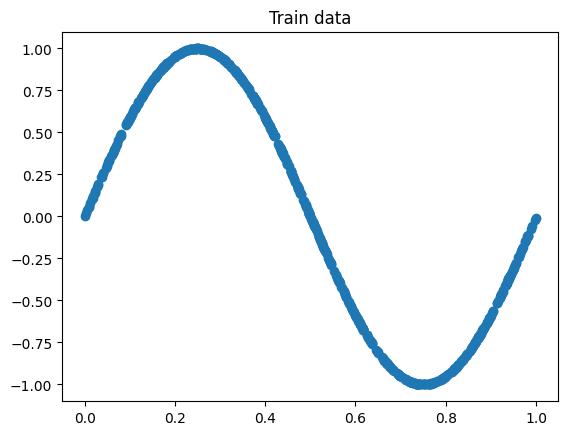

In [3]:
# Affichage

plt.scatter(x_train,y_train)
plt.title("Train data")


Text(0.5, 1.0, 'Val data')

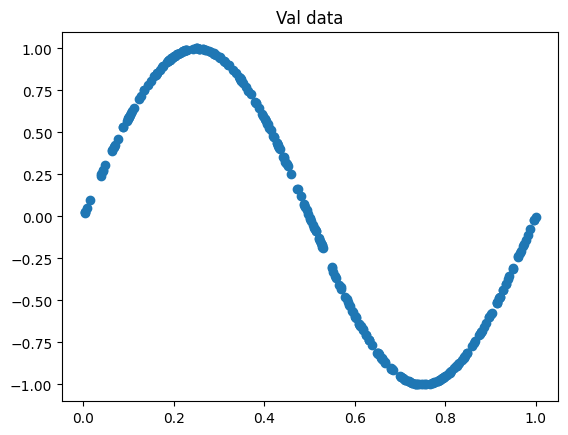

In [4]:
# Affichage

plt.scatter(x_val,y_val)
plt.title("Val data")

# Modèle

In [5]:
# Fully connected neural network with one hidden layer
from torch.nn.modules import Linear
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, out_dim):
        """
        Args
        input_size : Taille d'entrée
        hidden_size : dimension couches cachées
        out_dim : dimension de sortie

        """
        super(NeuralNet, self).__init__()
        self.fc1 = Linear(input_size, hidden_size)
        self.activation = nn.Sigmoid()
        self.fc2 = Linear(hidden_size, hidden_size)
        self.fc3 = Linear(hidden_size, out_dim)
        
    
    def forward(self, x):
        
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        
        return out

    
    # Fully connected neural network with one hidden layer
class SequentialNeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, out_dim):
        """
        Args
        input_size : Taille d'entrée
        hidden_size : dimension couches cachées
        out_dim : dimension de sortie

        """
        super(NeuralNet, self).__init__()
        self.model = nn.Sequential(
            Linear(input_size, hidden_size),
            nn.Sigmoid(),
            Linear(hidden_size, hidden_size),
            nn.Sigmoid(),
            Linear(hidden_size, out_dim)
        )
       
 
    
    def forward(self, x):
        out = self.model(x)
        return out
    


In [6]:
input_size = 1
hidden_size = 32
num_classes = 1
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

c:\Users\natha\Documents\Git\5th-year-polytech\transformers\env\Lib\site-packages\torch\nn\modules\module.py:1355: UserWarning: expandable_segments not supported on this platform (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\c10/cuda/CUDAAllocatorConfig.h:35.)
  return t.to(


In [7]:
#Model parameters

for name, param in model.named_parameters():
    print(name , param, param.requires_grad, "\n"+"----------------------------------"*2)

fc1.weight Parameter containing:
tensor([[ 0.2897],
        [ 0.6206],
        [-0.2175],
        [ 0.1785],
        [-0.8204],
        [ 0.1972],
        [-0.6541],
        [ 0.7296],
        [-0.1290],
        [-0.9827],
        [-0.2756],
        [ 0.6834],
        [-0.6451],
        [-0.2365],
        [-0.0211],
        [-0.4551],
        [ 0.9685],
        [ 0.9882],
        [-0.0209],
        [-0.8313],
        [-0.9708],
        [ 0.8040],
        [-0.1293],
        [-0.0247],
        [ 0.9781],
        [-0.7709],
        [-0.9172],
        [ 0.8986],
        [-0.7402],
        [-0.5163],
        [ 0.8055],
        [-0.8942]], device='cuda:0', requires_grad=True) True 
--------------------------------------------------------------------
fc1.bias Parameter containing:
tensor([-0.8407,  0.7366, -0.8108, -0.6870,  0.0231,  0.6713,  0.1502, -0.8475,
         0.0261, -0.9898,  0.1680,  0.7647,  0.5523,  0.0867, -0.5486,  0.3382,
         0.5143, -0.5428, -0.4740, -0.4404,  0.7764,  0

# Fonction de cout

In [8]:
# Loss and optimizer
criterion = nn.MSELoss()

# Optimiseur

In [9]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Entrainement du modèle

In [10]:
# Train the model
batch_size = 10
num_epochs = 500
N_train = x_train.shape[0]
batch_per_epoch = N_train//batch_size
batch_per_epoch = batch_per_epoch + 1 if N_train%batch_per_epoch != 0 else batch_per_epoch

x_train = torch.tensor(x_train, dtype = torch.float32).reshape(-1, 1)
y_train = torch.tensor(y_train, dtype = torch.float32).reshape(-1, 1)

model.train()

for epoch in range(num_epochs):
    avg_loss = 0.0
    for i in range(batch_per_epoch):

        start = i*batch_size
        end = min(N_train, (i+1)*batch_size)

         # Move tensors to the configured device
        x_train_batch = x_train[start:end].to(device)
        y_train_batch = y_train[start:end].to(device)

        
        # Forward pass

        y_pred = model(x_train_batch)

        loss = criterion(y_pred, y_train_batch)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        avg_loss +=loss
        
    avg_loss/=batch_per_epoch
        
        #if (i+1) % 100 == 0:
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
           .format(epoch+1, num_epochs, i+1, batch_per_epoch, avg_loss.item()))

Epoch [1/500], Step [70/70], Loss: 0.5231
Epoch [2/500], Step [70/70], Loss: 0.4980
Epoch [3/500], Step [70/70], Loss: 0.4809
Epoch [4/500], Step [70/70], Loss: 0.4581
Epoch [5/500], Step [70/70], Loss: 0.4272
Epoch [6/500], Step [70/70], Loss: 0.3860
Epoch [7/500], Step [70/70], Loss: 0.3344
Epoch [8/500], Step [70/70], Loss: 0.2779
Epoch [9/500], Step [70/70], Loss: 0.2274
Epoch [10/500], Step [70/70], Loss: 0.1926
Epoch [11/500], Step [70/70], Loss: 0.1745
Epoch [12/500], Step [70/70], Loss: 0.1672
Epoch [13/500], Step [70/70], Loss: 0.1647
Epoch [14/500], Step [70/70], Loss: 0.1639
Epoch [15/500], Step [70/70], Loss: 0.1636
Epoch [16/500], Step [70/70], Loss: 0.1634
Epoch [17/500], Step [70/70], Loss: 0.1633
Epoch [18/500], Step [70/70], Loss: 0.1631
Epoch [19/500], Step [70/70], Loss: 0.1630
Epoch [20/500], Step [70/70], Loss: 0.1628
Epoch [21/500], Step [70/70], Loss: 0.1627
Epoch [22/500], Step [70/70], Loss: 0.1625
Epoch [23/500], Step [70/70], Loss: 0.1623
Epoch [24/500], Step

# Predict

C:\Users\natha\AppData\Local\Temp\ipykernel_5992\434166650.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val = torch.tensor(x_val, dtype = torch.float32).reshape(-1, 1)


Text(0.5, 1.0, 'Prediction vs Exact data')

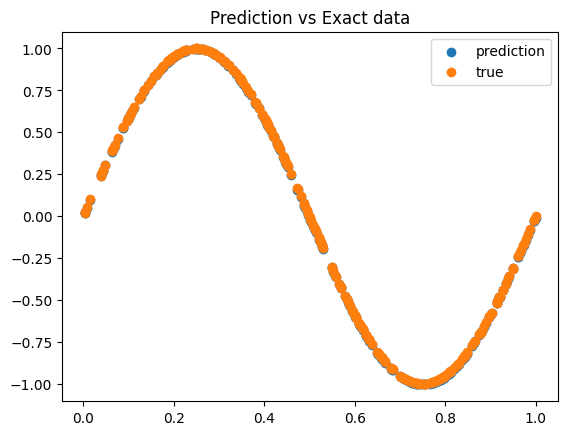

In [15]:
x_val = torch.tensor(x_val, dtype = torch.float32).reshape(-1, 1)
y_val = torch.tensor(y_val, dtype = torch.float32).reshape(-1, 1)

model.eval()
with torch.no_grad():
    y_val_pred = model(x_val.to(device))
# Affichage
y_val_pred = y_val_pred.detach().cpu().numpy()
plt.scatter(x_val,y_val_pred,label = "prediction")
plt.scatter(x_val,y_val, label ="true")
plt.legend()
plt.title("Prediction vs Exact data")

# Save the model

In [ ]:
path = "./mymodel.pt"

#Sauvegardez toujours votre modèle sur CPU !

# Save just the state dict

torch.save(model.to("cpu"), path)

#Save the model as a pickle object



# Load the model

In [13]:
# Load just the state dict

#Load the pickle object

# Model class must be defined somewhere


Le processus de sauvegarde/chargement utilise la syntaxe la plus intuitive et implique le moins de code possible. Enregistrer un modèle de cette manière sauve le module entier en utilisant le module pickle de Python. L'inconvénient de cette approche est que les données sérialisées sont liées aux classes spécifiques et à la structure exacte du répertoire utilisée lors de l'enregistrement du modèle. Cela est dû au fait que pickle n'enregistre pas la classe du modèle elle-même. Au lieu de cela, il enregistre un chemin vers le fichier contenant la classe, qui est utilisé lors du chargement. Pour cette raison, votre code peut rencontrer des problèmes dans divers cas d'utilisation, comme dans d'autres projets ou après des refactorisations.   

Une convention courante dans PyTorch consiste à enregistrer les modèles avec l'extension .pt ou .pth.

N'oubliez pas d'appeler model.eval() pour définir les couches de dropout et de normalisation par lots en mode évaluation avant d'exécuter l'inférence. Ne pas le faire entraînera des résultats d'inférence incohérents.



# Créer un module custom

## Batch Normalisation



Ecrire le module de batch normalisation 1d .
$$y= \beta + \frac{x-E(x)}{\sqrt{Var(x)+\epsilon}} * \gamma$$


Calculer E(x) et Var(x) avec un momentum :

E(x) = momentum * E(x) + (1 - momentum) * batch_mean
Prendre $\epsilon$ = 1e-5 , momentum = 0.9.

Distinguer la phase d'apprentissage et de test. En phase d'inférence , les moyennes sont figées

In [ ]:
class BatchNorm1d(nn.Module):
    def __init__(self, num_features = 10):
        super().__init__()
        self.num_features = 10
        self.momentum = 0.9
        self.eps = 1e-5
    
    def forward(self, x):
        return self.momentum + (x - x.mean())

from torch.nn import BatchNorm1d

SyntaxError: incomplete input (2017893757.py, line 1)

In [ ]:
BatchNorm1d

In [ ]:
# Create a batch normalization layer
bn_layer = BatchNorm1d(num_features=10)

# Input tensor
x = torch.randn(4, 10)  # Batch size 32, 10 features

#torch batch normalisation

torch_bn_layer = nn.BatchNorm1d(num_features=10)
# Apply batch normalization
output = bn_layer(x)
output_torch = torch_bn_layer(x)

print(torch.allclose(output,output_torch))

## Resnet Block 

![ResNet Block](https://d2l.ai/_images/residual-block.svg)

In [ ]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):


# Exercice : Faire un modèle qui est une combinaison linéaire de 2 autres modèles

# Chargement de données efficaces
# Que se passe il si mon dataset est plus grand que ma RAM ?

## Dataloader and dataset


In [ ]:
class SineDataset(torch.utils.data.Dataset):

    



    


In [ ]:
dataset=SineDataset(N = 10**3,seed = 2024,percentage_of_training_data = 0.3,train_mode = True)

dataloader = torch.utils.data.DataLoader(dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True,num_workers=1)

In [ ]:
input_size = 1
hidden_size = 32
num_classes = 1
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
# Train the model
batch_size = 10
num_epochs = 500

model =model.to(device)
model.train()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
for epoch in range(num_epochs):
    avg_loss = 0.0
    
    avg_loss/=i
        
        #if (i+1) % 100 == 0:
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
           .format(epoch+1, num_epochs, i+1, batch_per_epoch, avg_loss.item()))

In [ ]:
dataset.is_train = True
model.eval()
x_val, y_val_true , y_val_pred = [], [],[]

with torch.no_grad():





# Affichage

plt.scatter(x_val,y_val_pred,label = "prediction")
plt.scatter(x_val,y_val_true, label ="true")
plt.legend()
plt.title("Prediction vs Exact data")

In [ ]:
import torchvision
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 




# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
mnist_train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

mnist_test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)



# Afficher quelque images aléatoirement du contenu du dataset  MNIST

# Exercice :  Charger le dataset suivant dans pytorch et afficher des images de chaque classe: 
https://drive.google.com/file/d/1V_zyw7kZ1YnPYM4VzCtP9agY7PiFuH-P/view?usp=sharing